Parkinsons Disease Detection:

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number 

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several

measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent


spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [7]:
pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection and Analysis 

In [11]:
# Loading the dataset
parkin_data = pd.read_csv('/Users/suneethanaidumekala/Desktop/parkinsons.csv') 
print(parkin_data) 


               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [12]:
# printing the first five rows
parkin_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
# Checking number of rows and columns
print(parkin_data.shape)

(195, 24)


In [15]:
print(parkin_data.info)

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [16]:
print(parkin_data.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [17]:
# Checking for missing values in each col
parkin_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Statistical Analysis

In [18]:
# Statistical measures about data
parkin_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [34]:
pip install factor-analyzer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=83d410c168caf883a999220f82cd3b4d76fb755cc0dbe1d2cc9f0d639ff5e671
  Stored in directory: /Users/suneethanaidumekala/Library/Caches/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor-analyzer

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
from scipy import stats, linalg
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

### Normality test Using Shapiro

In [38]:
from scipy.stats import shapiro
import pandas as pd
cols_of_interest = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 
                    'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2','D2', 'PPE']
for col in cols_of_interest:
    col_data = parkin_data[col]
    stat, p = shapiro(col_data)
    print(f"Column '{col}': Statistic= {stat:.4f}, p = {p:.20f}")
    alpha = 0.05
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)\n")
    else:
        print("Sample does not look Gaussian (reject H0)\n")

Column 'MDVP:Fo(Hz)': Statistic= 0.9371, p = 0.00000017337838028452
Sample does not look Gaussian (reject H0)

Column 'MDVP:Fhi(Hz)': Statistic= 0.7228, p = 0.00000000000000000930
Sample does not look Gaussian (reject H0)

Column 'MDVP:Flo(Hz)': Statistic= 0.8608, p = 0.00000000000227437151
Sample does not look Gaussian (reject H0)

Column 'MDVP:Jitter(%)': Statistic= 0.6835, p = 0.00000000000000000064
Sample does not look Gaussian (reject H0)

Column 'MDVP:Jitter(Abs)': Statistic= 0.7665, p = 0.00000000000000025664
Sample does not look Gaussian (reject H0)

Column 'MDVP:RAP': Statistic= 0.6479, p = 0.00000000000000000007
Sample does not look Gaussian (reject H0)

Column 'MDVP:PPQ': Statistic= 0.6808, p = 0.00000000000000000054
Sample does not look Gaussian (reject H0)

Column 'Jitter:DDP': Statistic= 0.6477, p = 0.00000000000000000007
Sample does not look Gaussian (reject H0)

Column 'MDVP:Shimmer': Statistic= 0.8361, p = 0.00000000000014874931
Sample does not look Gaussian (reject H0

### Mann-Whitney U test:

In [39]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'parkin_data' is your DataFrame and 'status' is the target variable (e.g., 0 and 1 groups)
cols_of_interest = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
                    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 
                    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
                    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 
                    'spread1', 'spread2', 'D2', 'PPE']

# Split data based on status (assuming binary target variable 'status' with values 0 and 1)
group1 = parkin_data[parkin_data['status'] == 0]
group2 = parkin_data[parkin_data['status'] == 1]

# Perform Mann-Whitney U Test for each feature
alpha = 0.05
for col in cols_of_interest:
    stat, p = mannwhitneyu(group1[col], group2[col], alternative='two-sided')
    print(f"Feature '{col}': U-statistic = {stat:.4f}, p-value = {p:.20f}")
    
    if p < alpha:
        print(f"Reject H0: Significant difference between groups for '{col}'\n")
    else:
        print(f"Fail to Reject H0: No significant difference between groups for '{col}'\n")


Feature 'MDVP:Fo(Hz)': U-statistic = 4944.0000, p-value = 0.00003051503784424029
Reject H0: Significant difference between groups for 'MDVP:Fo(Hz)'

Feature 'MDVP:Fhi(Hz)': U-statistic = 4762.0000, p-value = 0.00027962702389475050
Reject H0: Significant difference between groups for 'MDVP:Fhi(Hz)'

Feature 'MDVP:Flo(Hz)': U-statistic = 4920.0000, p-value = 0.00004151320575765159
Reject H0: Significant difference between groups for 'MDVP:Flo(Hz)'

Feature 'MDVP:Jitter(%)': U-statistic = 1568.5000, p-value = 0.00000000789792719494
Reject H0: Significant difference between groups for 'MDVP:Jitter(%)'

Feature 'MDVP:Jitter(Abs)': U-statistic = 1489.0000, p-value = 0.00000000127573925856
Reject H0: Significant difference between groups for 'MDVP:Jitter(Abs)'

Feature 'MDVP:RAP': U-statistic = 1574.0000, p-value = 0.00000000868936980375
Reject H0: Significant difference between groups for 'MDVP:RAP'

Feature 'MDVP:PPQ': U-statistic = 1501.5000, p-value = 0.00000000240149364342
Reject H0: Sig

### Data Visualization

In [48]:
pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

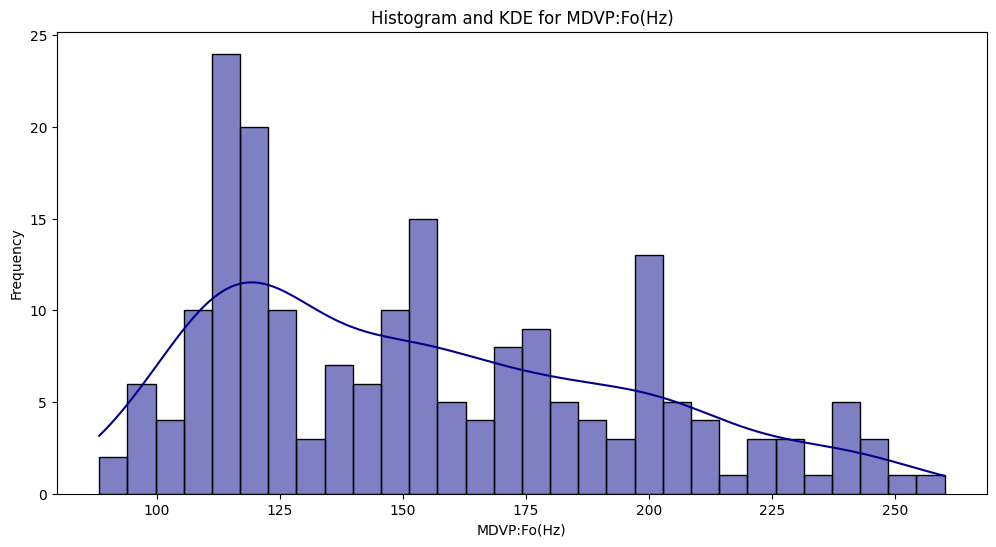

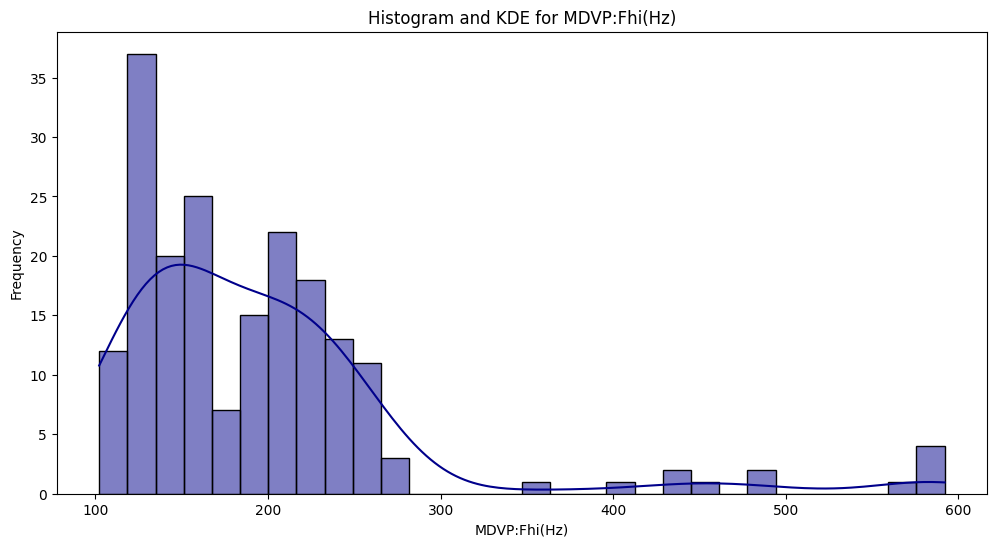

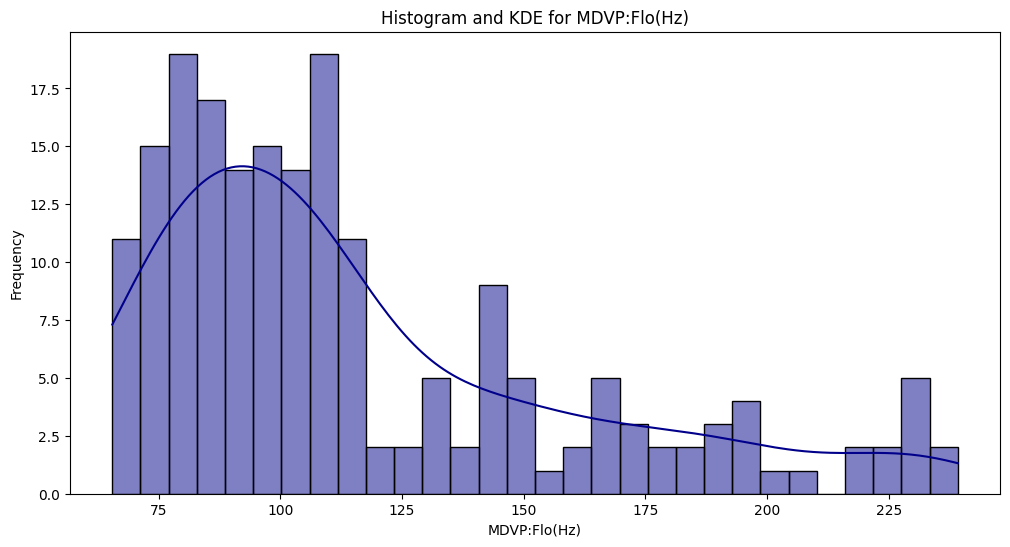

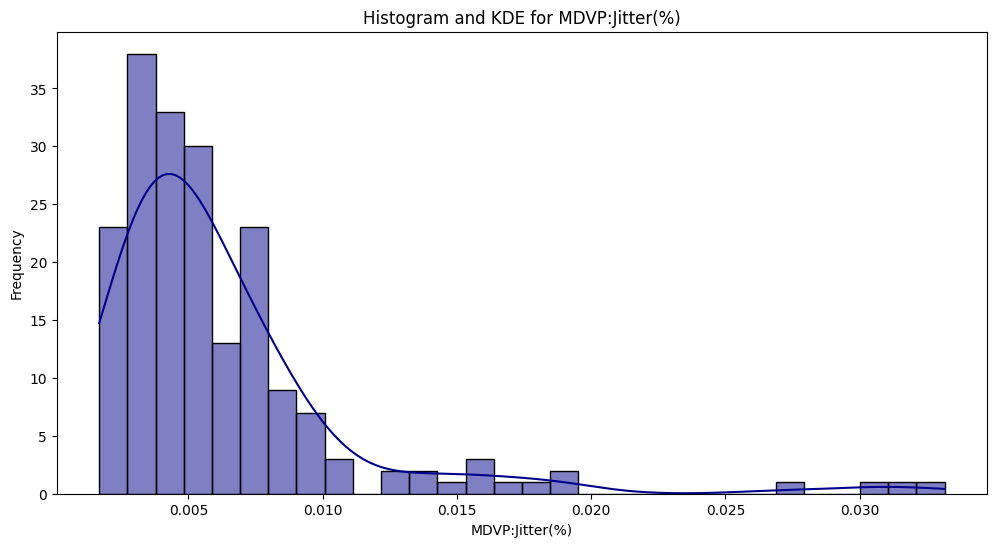

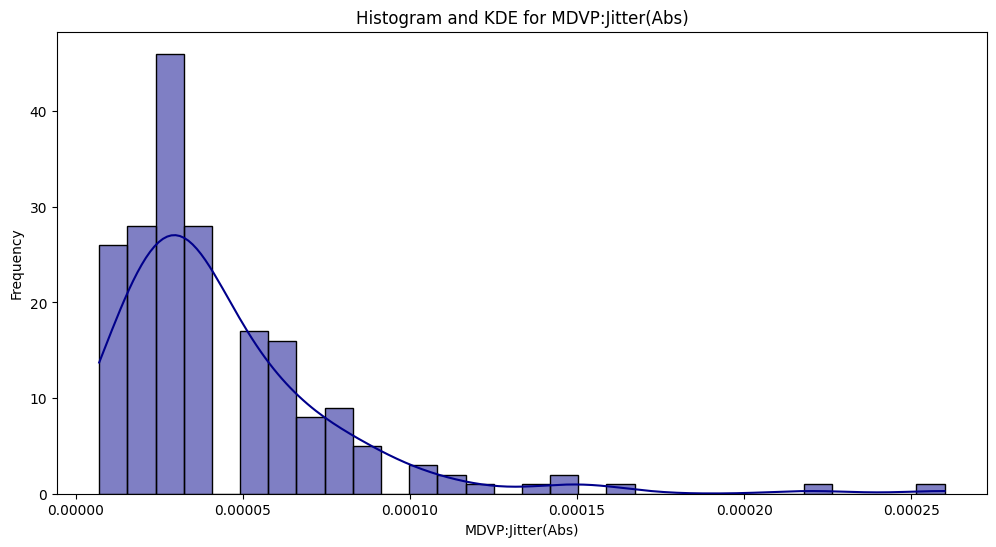

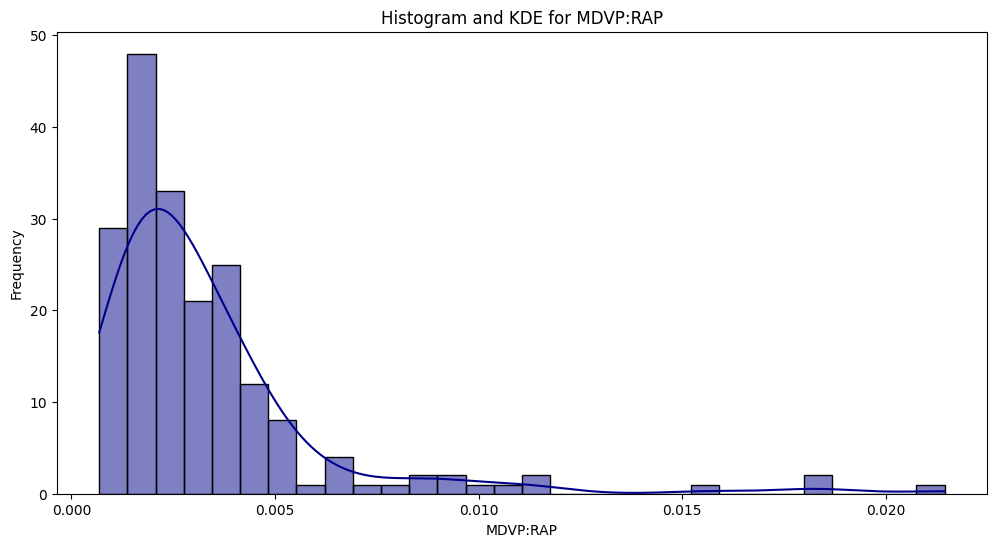

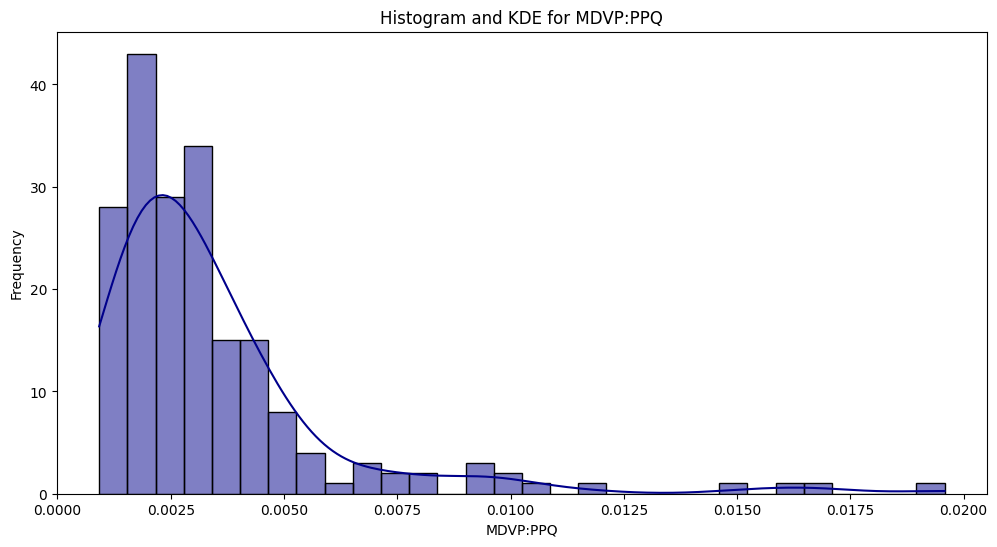

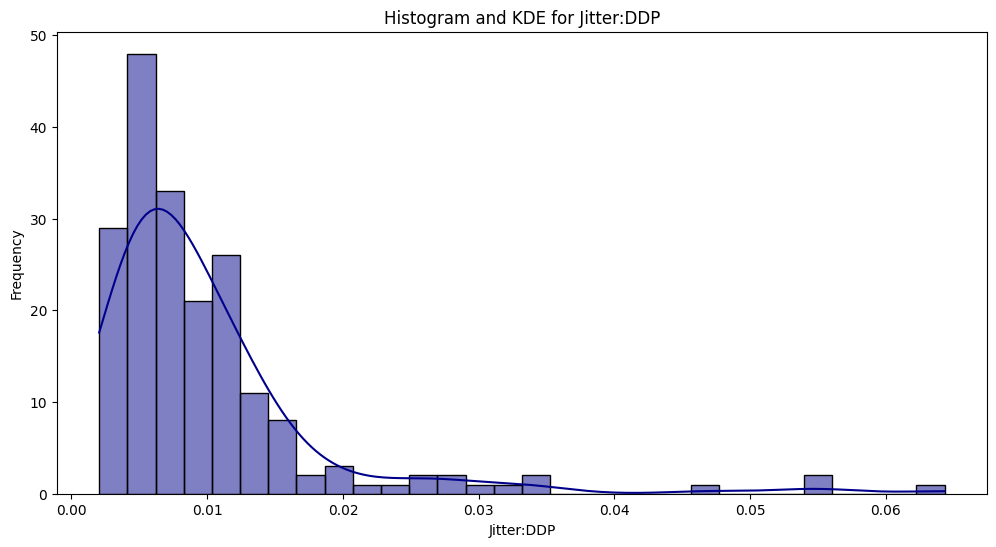

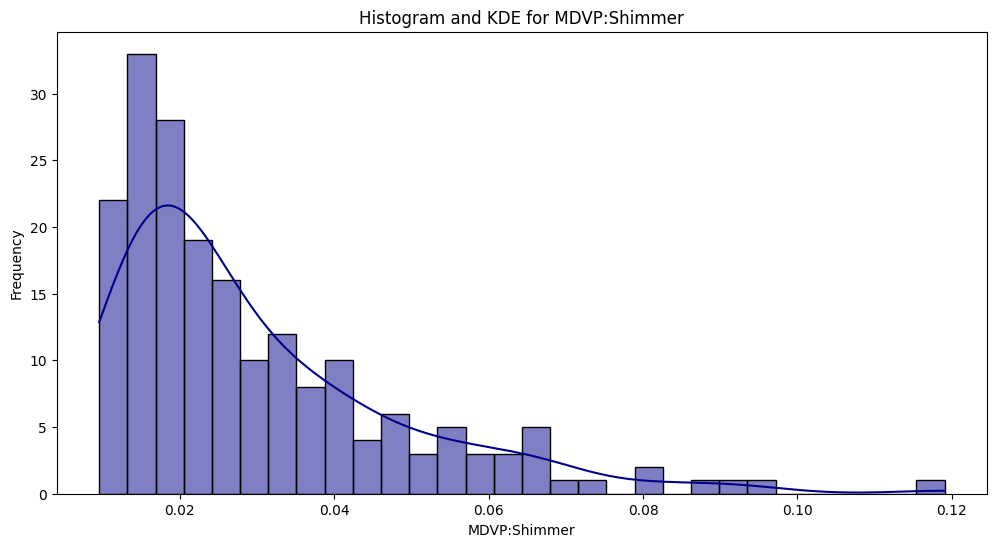

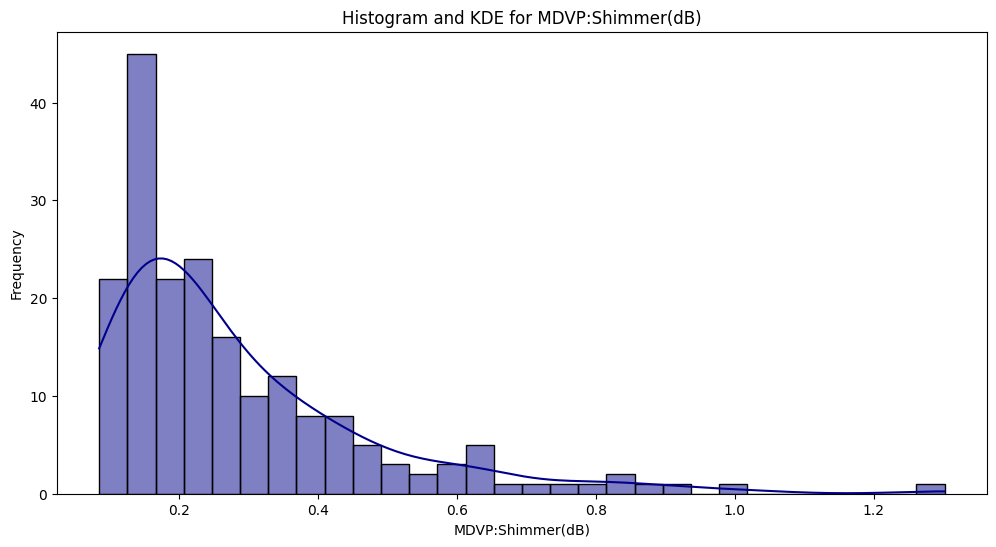

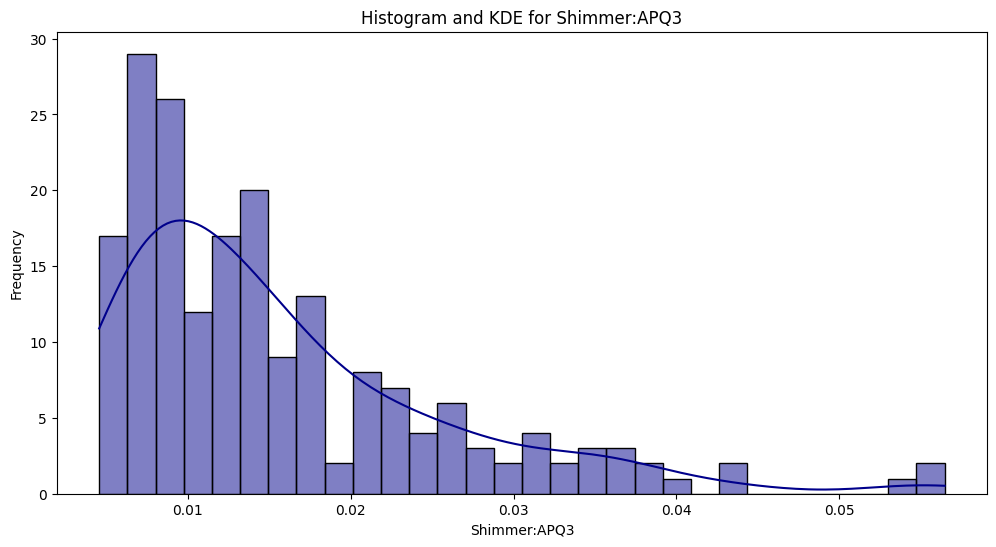

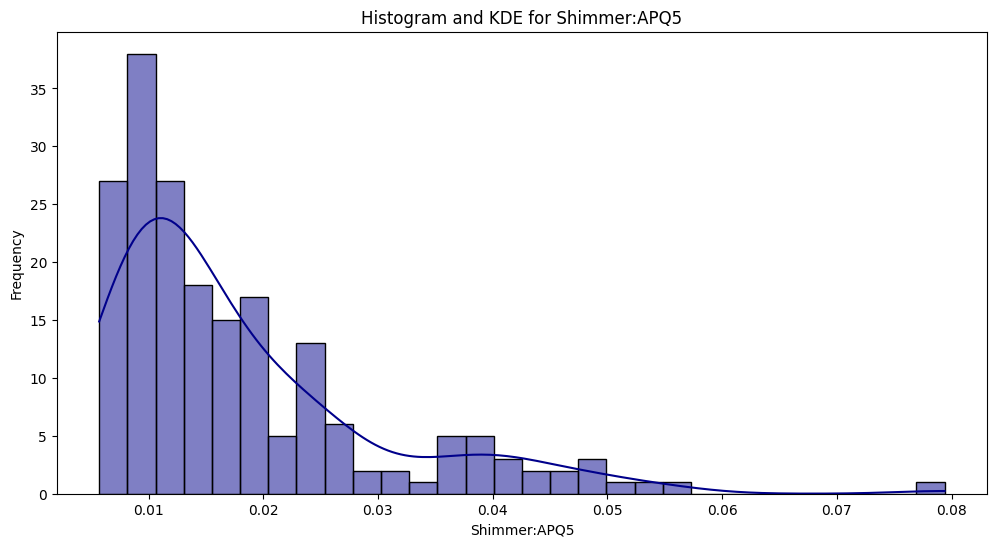

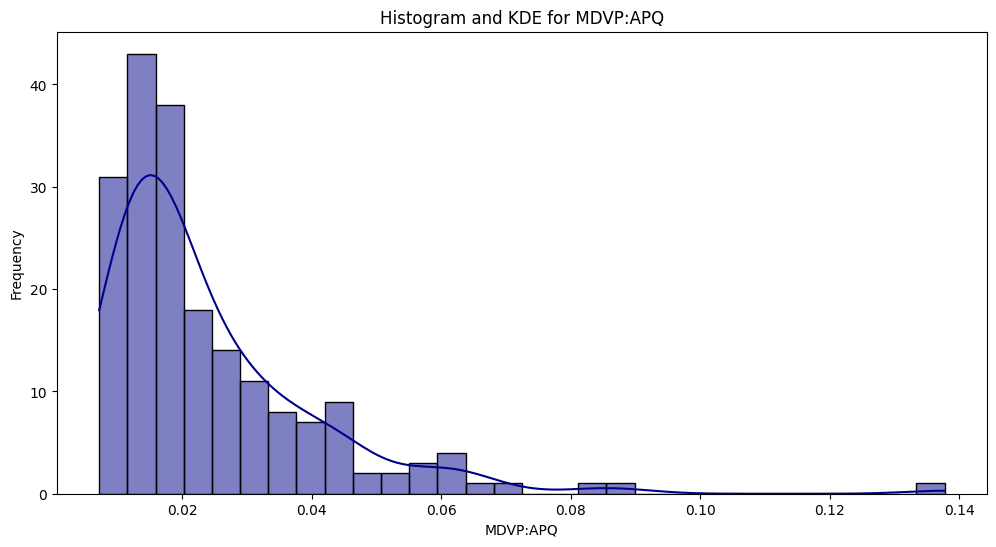

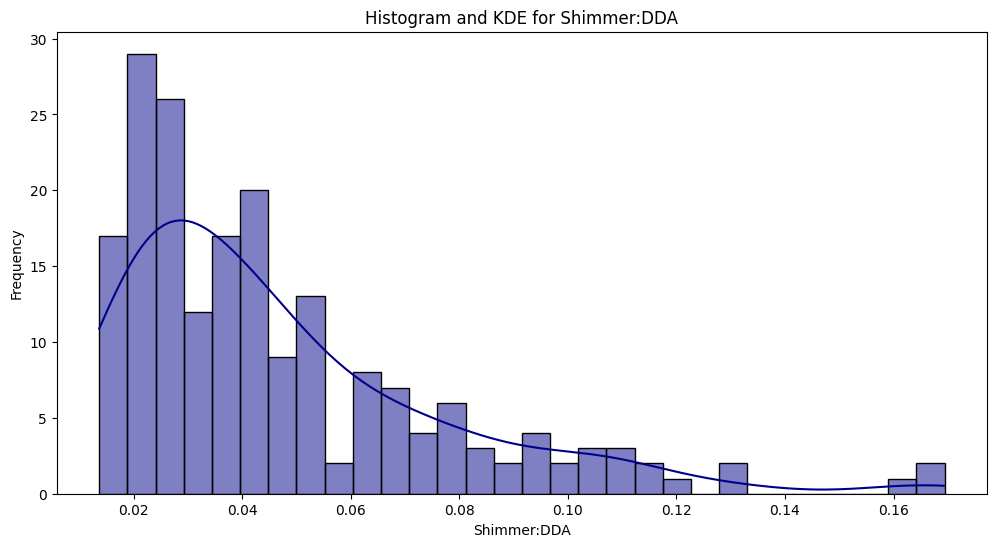

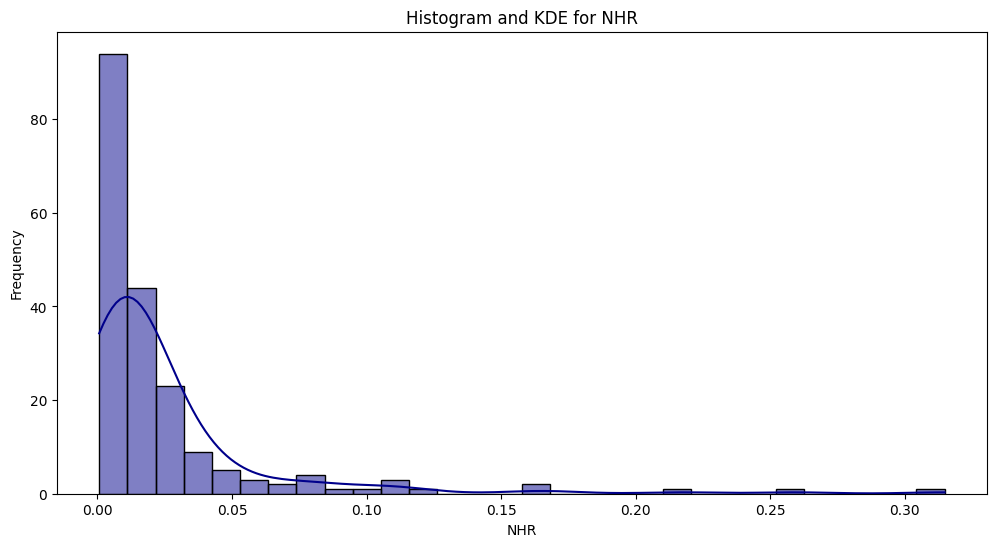

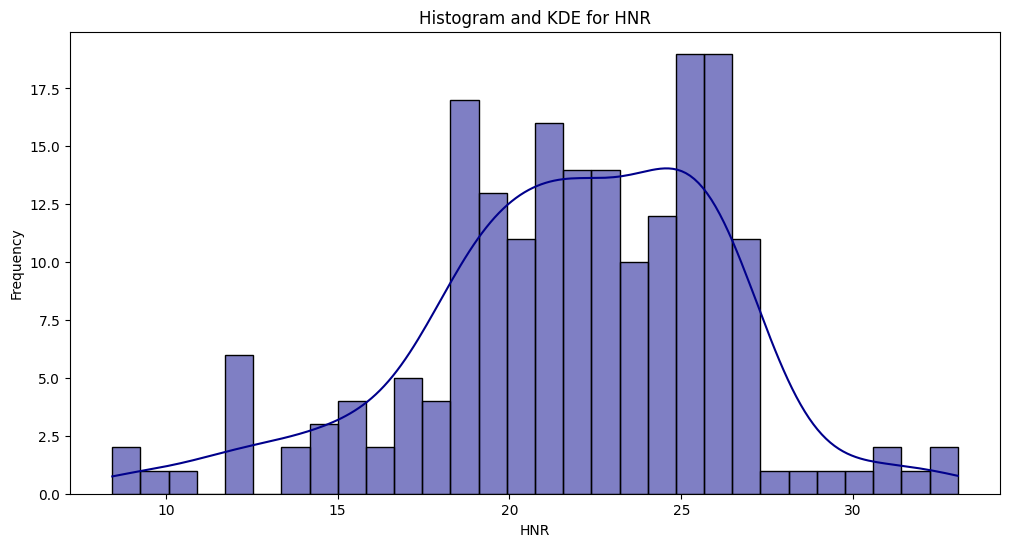

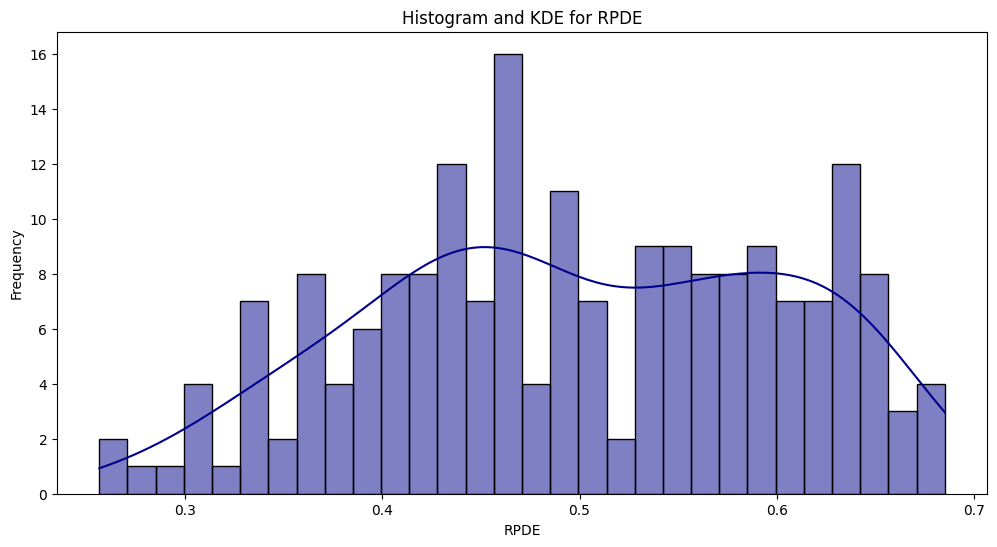

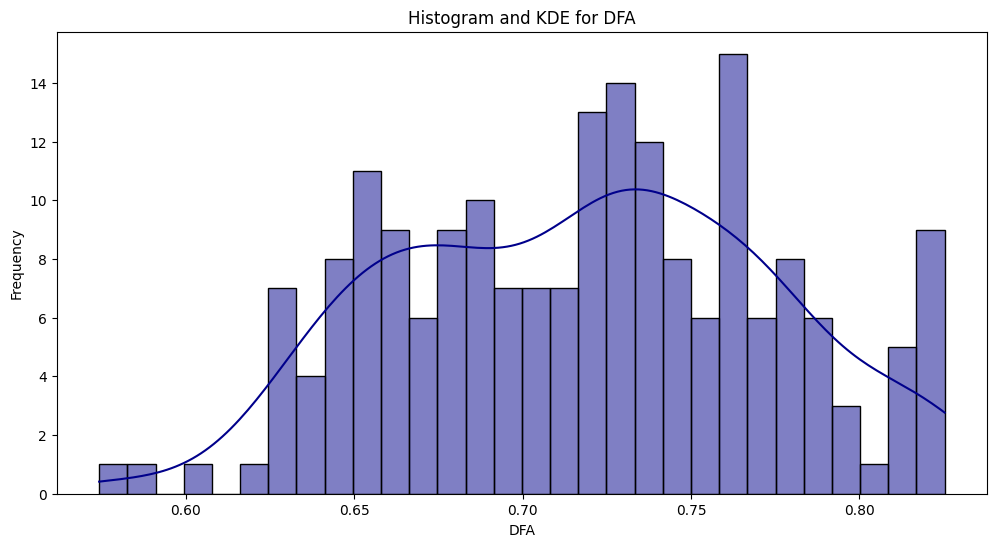

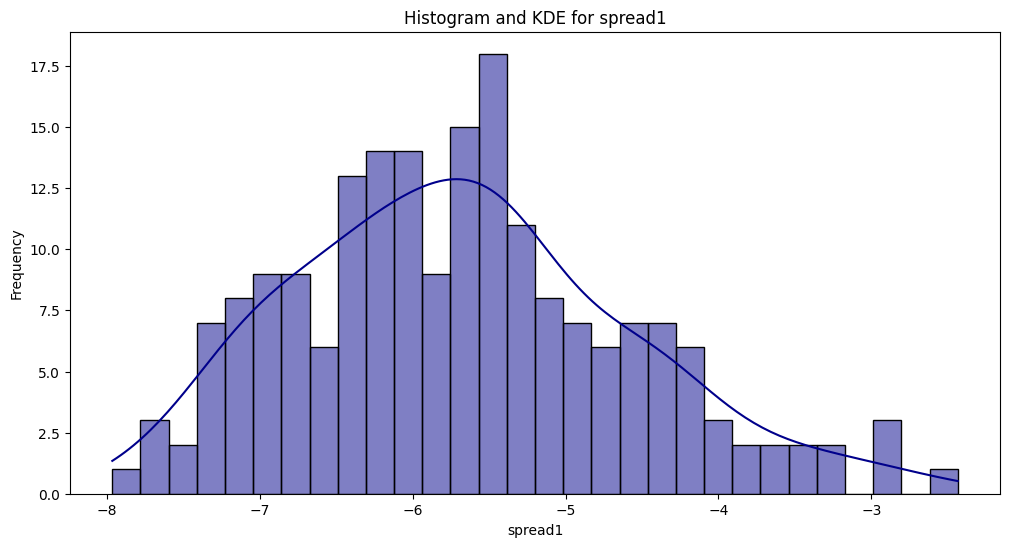

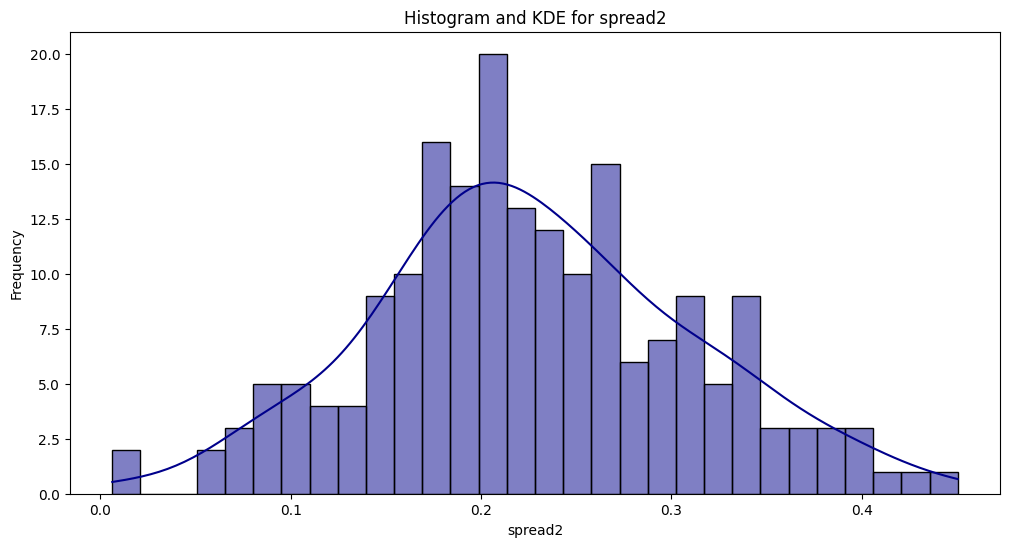

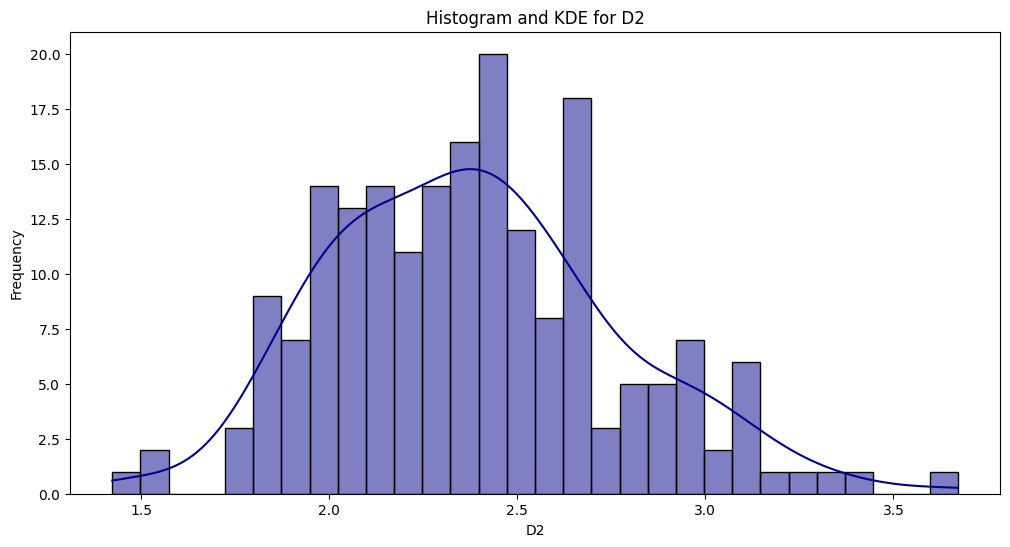

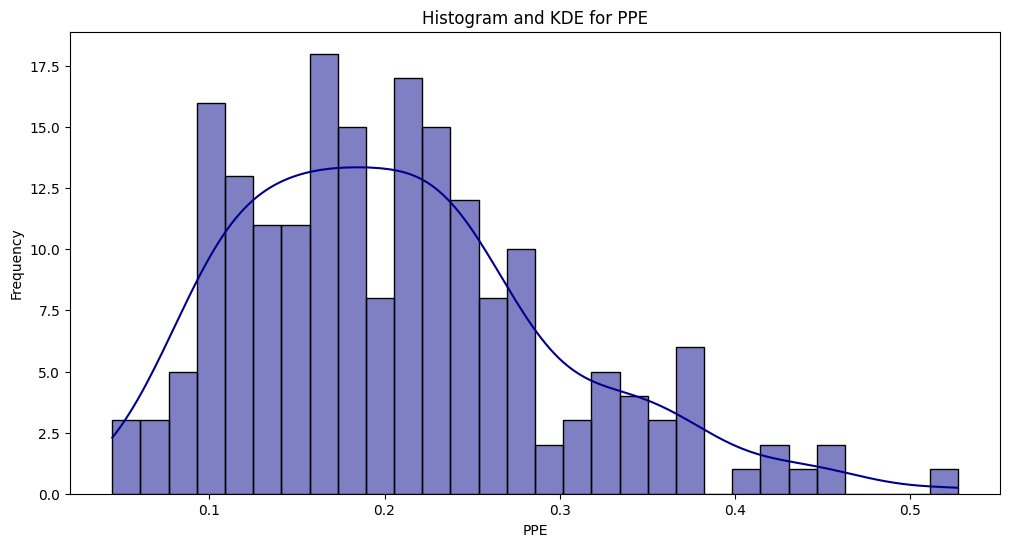

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Assuming `parkin_data` is your DataFrame and 'status' is your target variable

cols_of_interest = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 
    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 
    'spread1', 'spread2', 'D2', 'PPE'
]

# Set up matplotlib figure size
plt.figure(figsize=(12, 6))

# Histograms and Kernel Density Plots
for col in cols_of_interest:
    plt.figure(figsize=(12, 6))
    sns.histplot(parkin_data[col], kde=True, bins=30, color='darkblue', edgecolor='black')
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


<Figure size 1200x600 with 0 Axes>

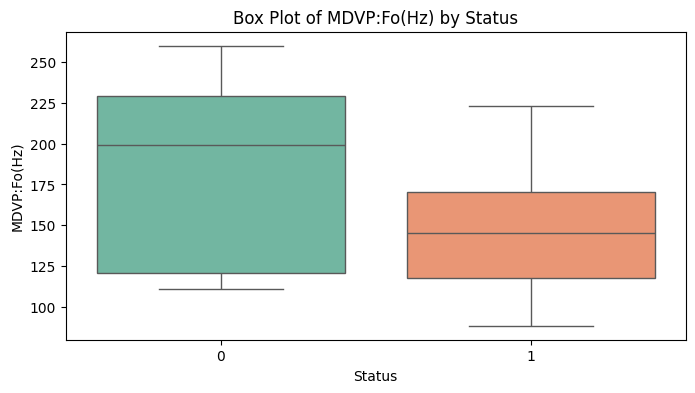

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


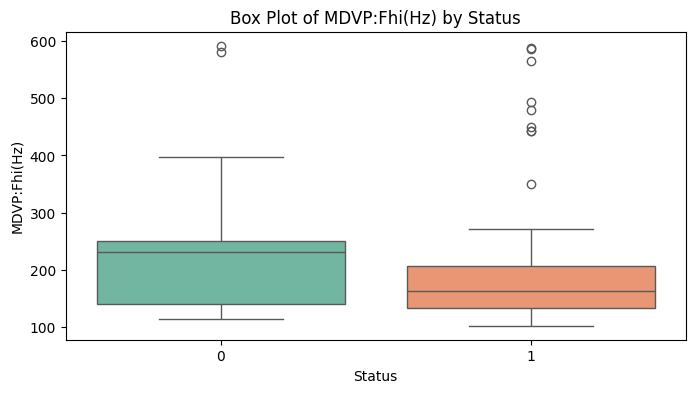

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


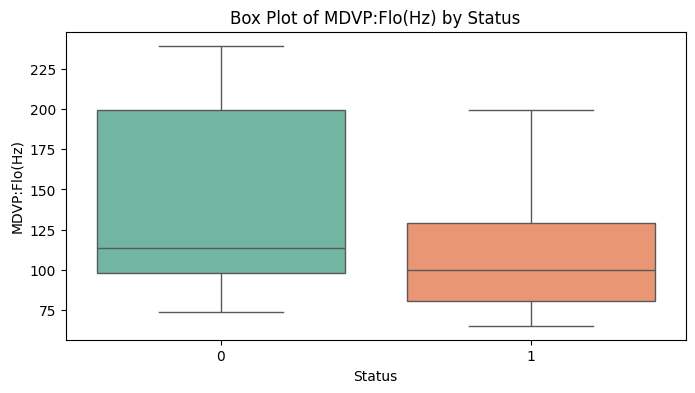

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


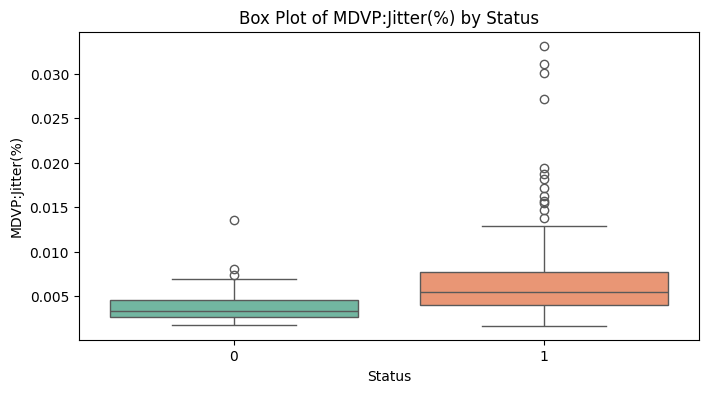

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


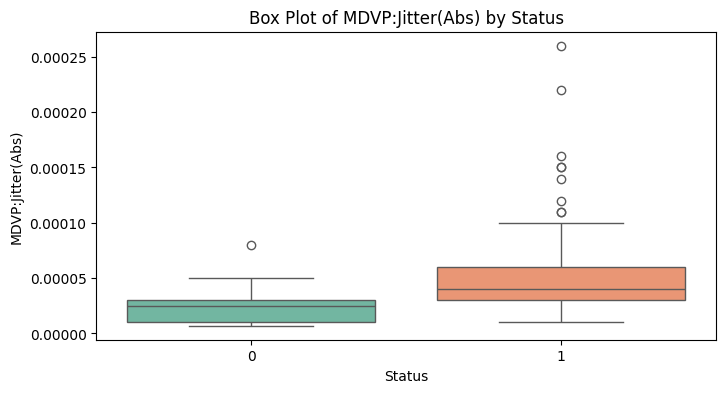

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


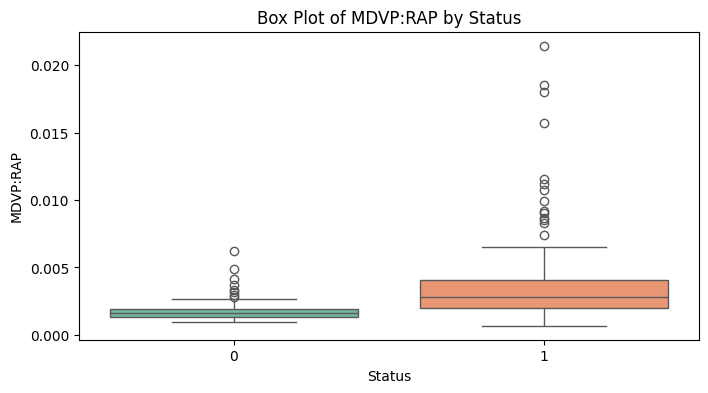

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


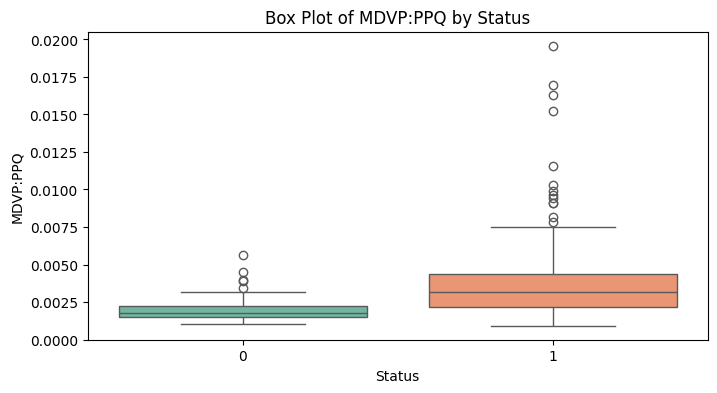

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


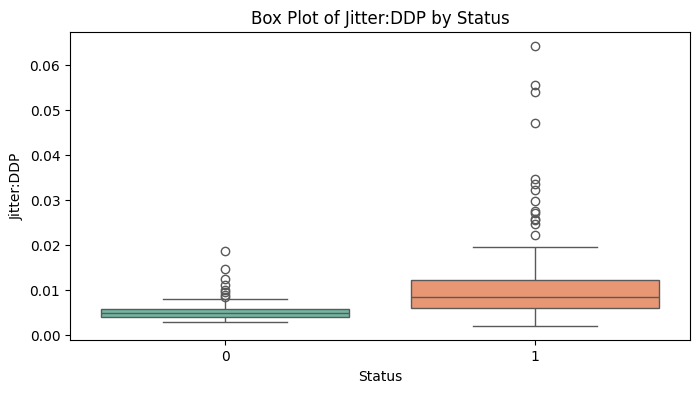

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


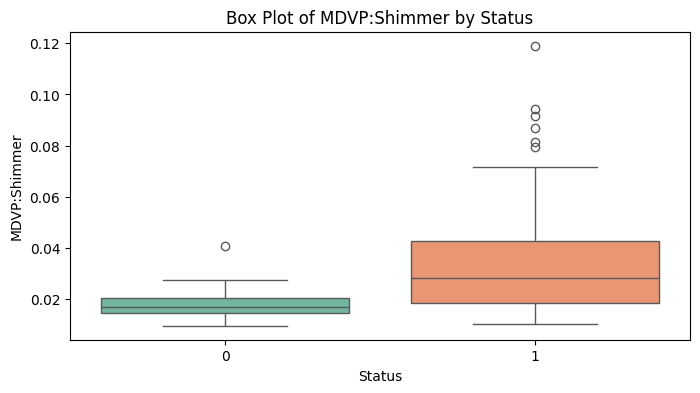

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


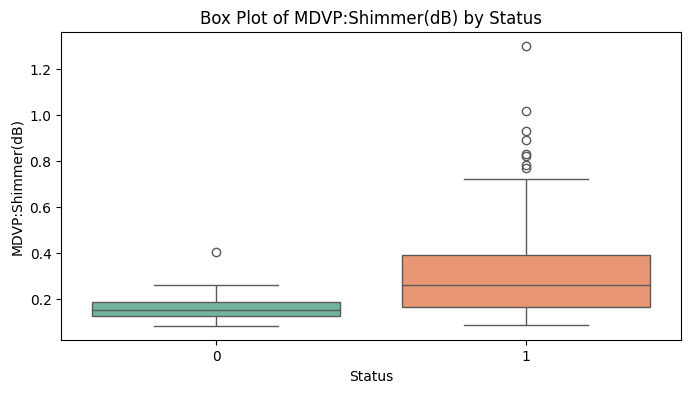

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


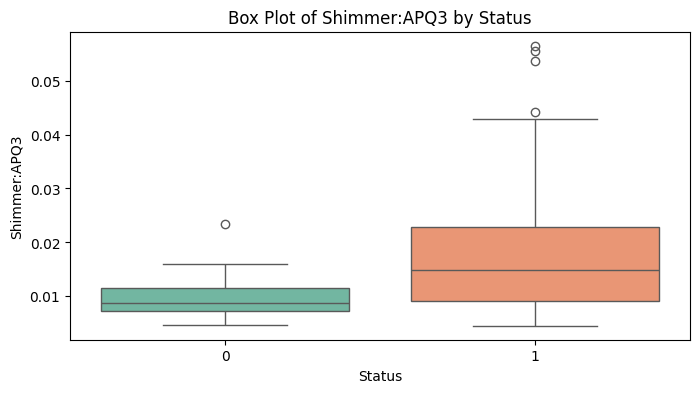

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


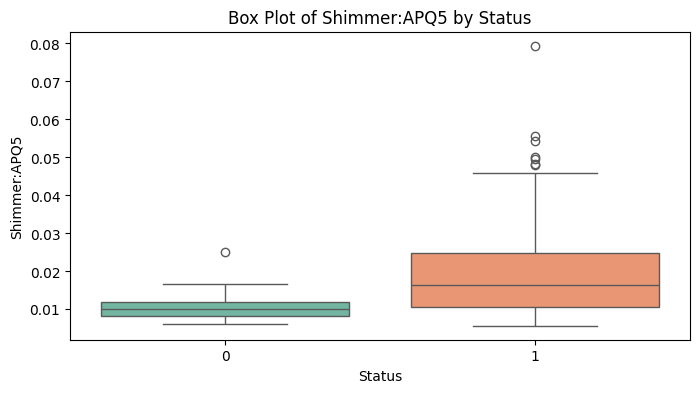

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


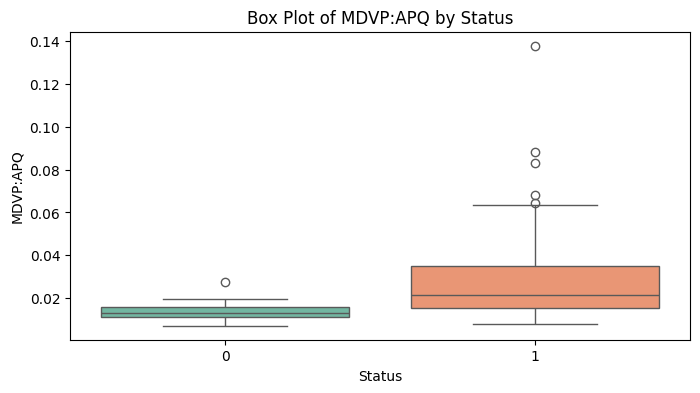

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


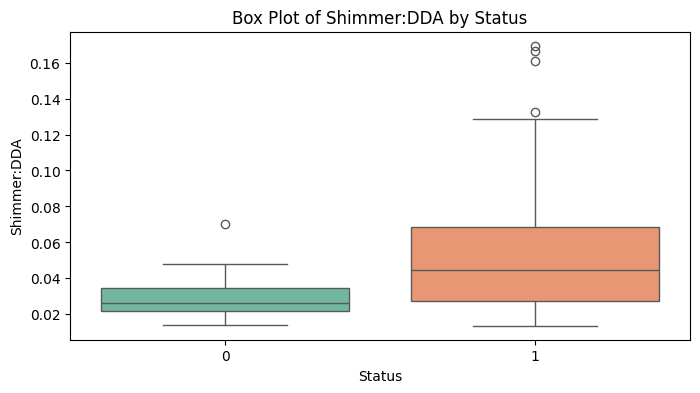

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


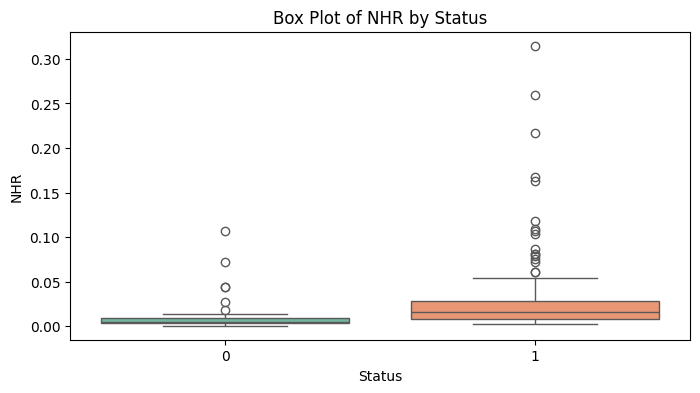

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


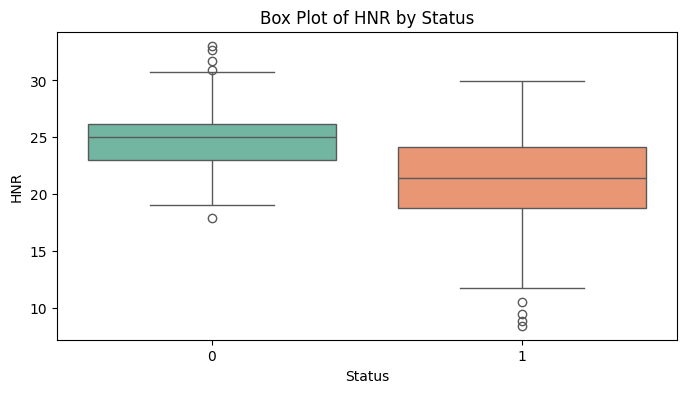

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


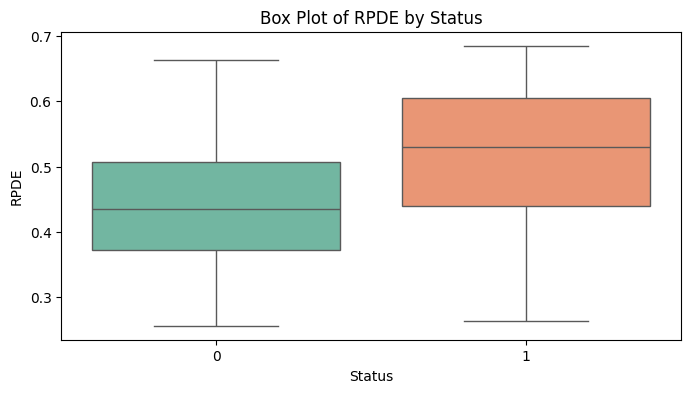

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


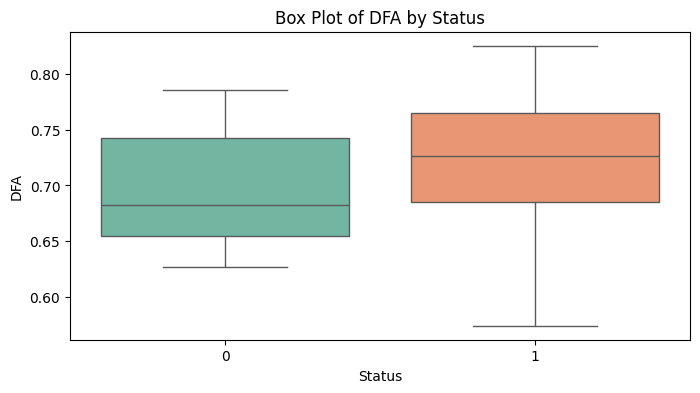

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


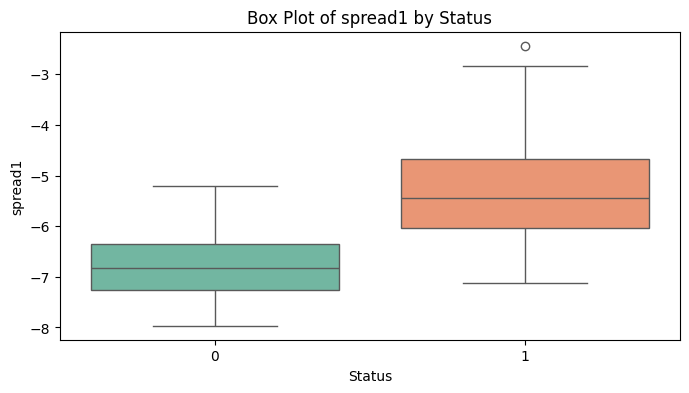

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


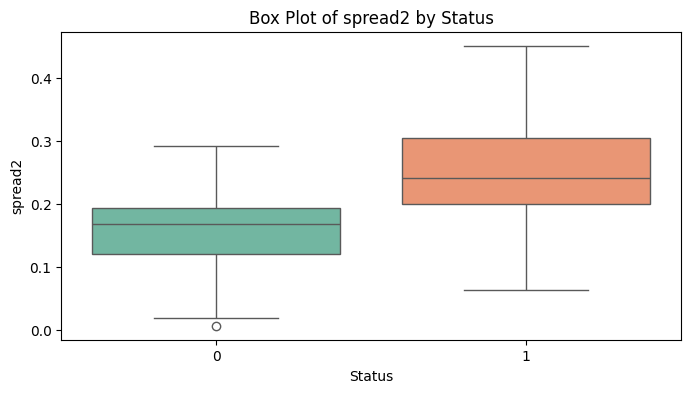

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


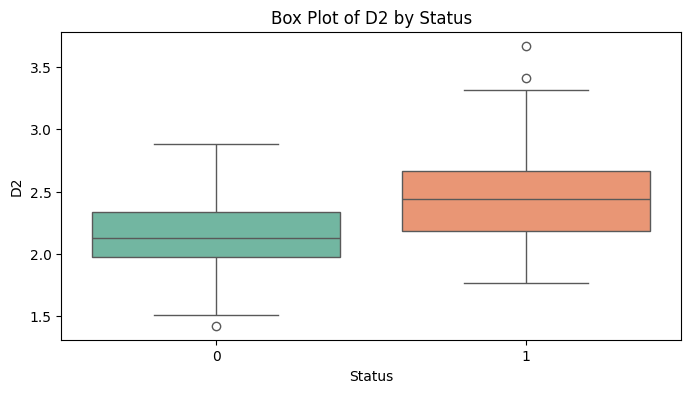

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/2242175079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")


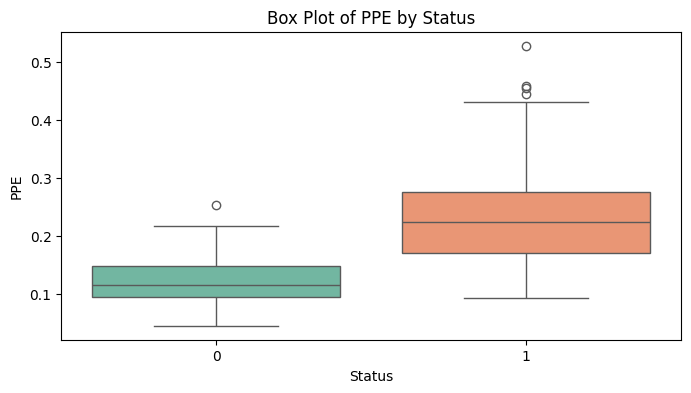

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Assuming `parkin_data` is your DataFrame and 'status' is your target variable

cols_of_interest = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 
    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 
    'spread1', 'spread2', 'D2', 'PPE'
]

# Set up matplotlib figure size
plt.figure(figsize=(12, 6))
for col in cols_of_interest:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='status', y=col, data=parkin_data, palette="Set2")
    plt.title(f'Box Plot of {col} by Status')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.show()




### Violin plots

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


<Figure size 1200x600 with 0 Axes>

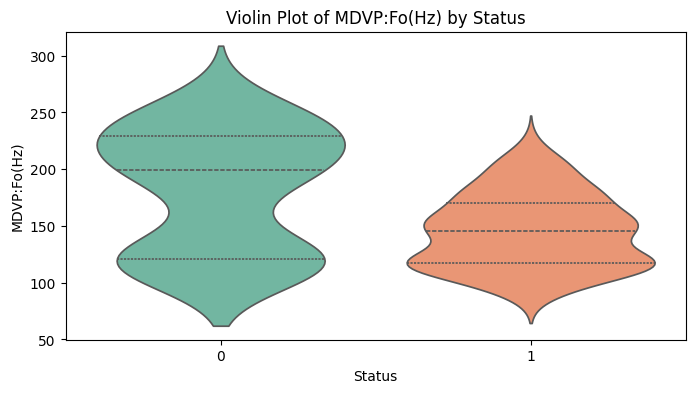

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


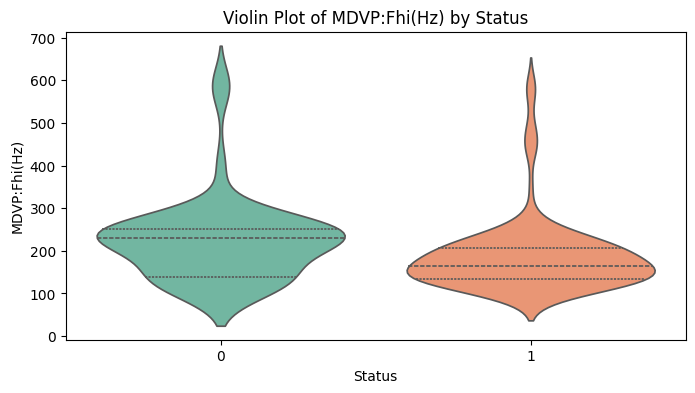

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


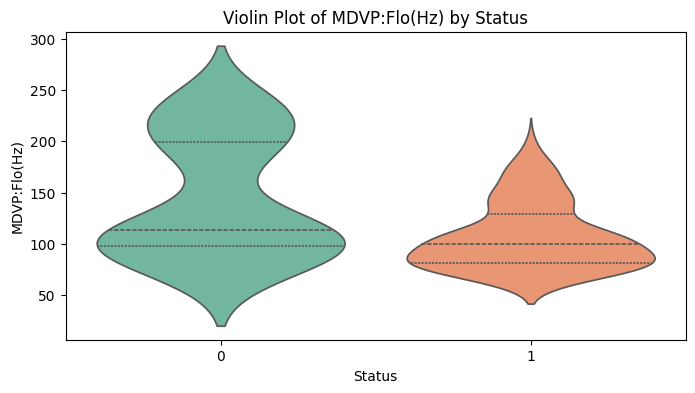

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


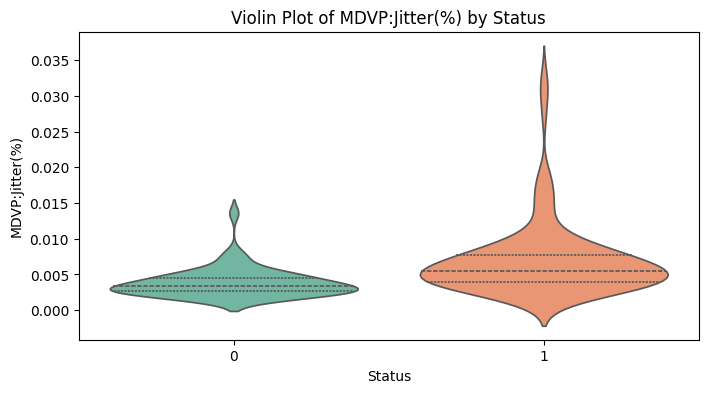

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


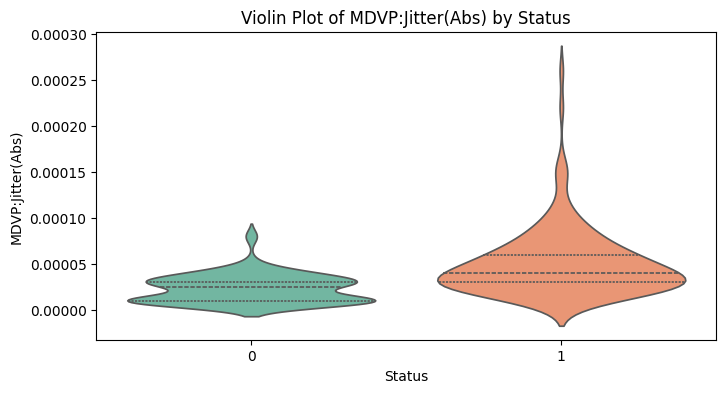

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


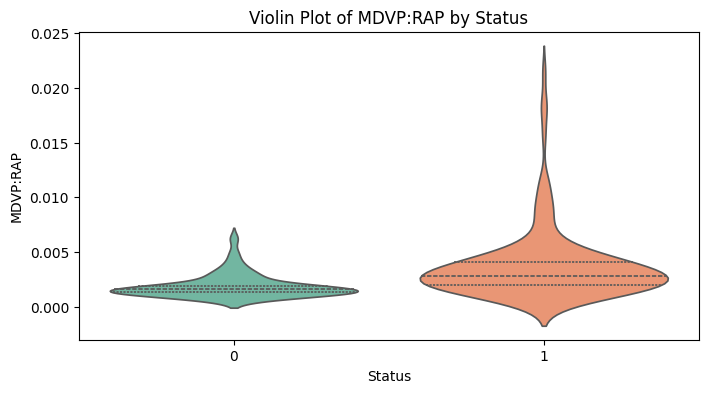

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


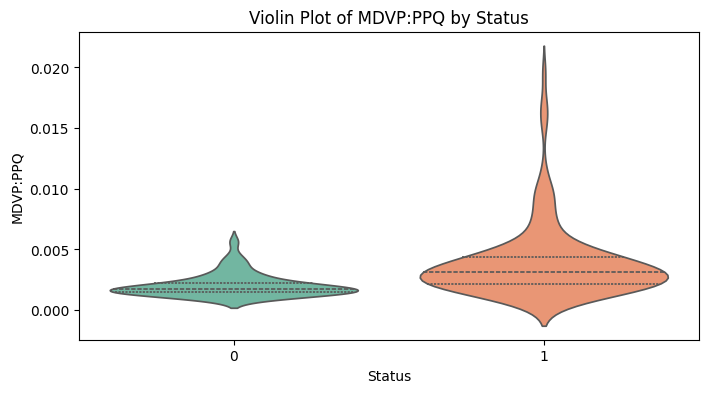

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


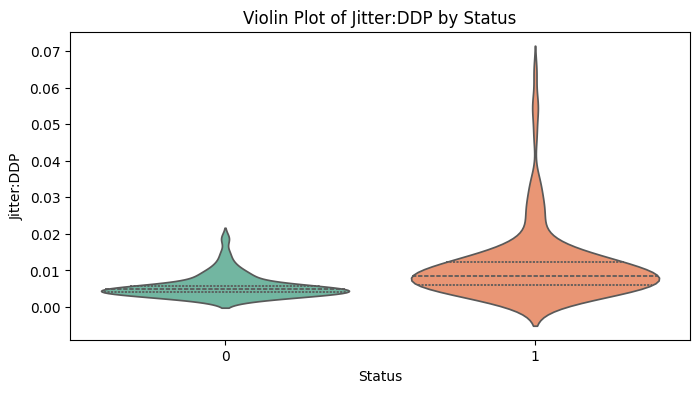

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


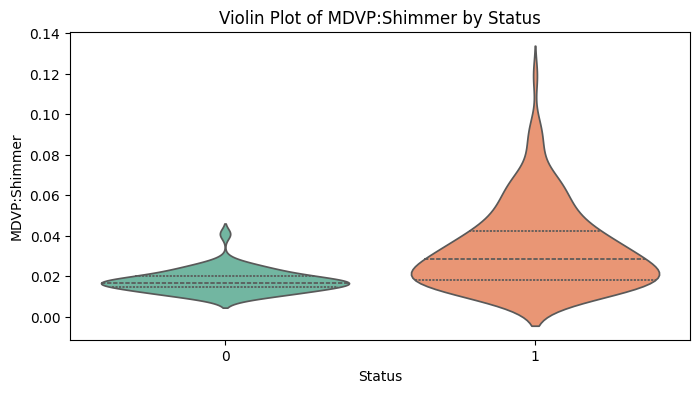

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


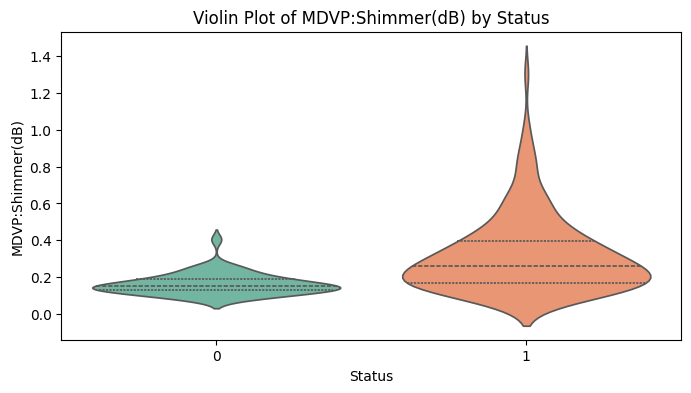

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


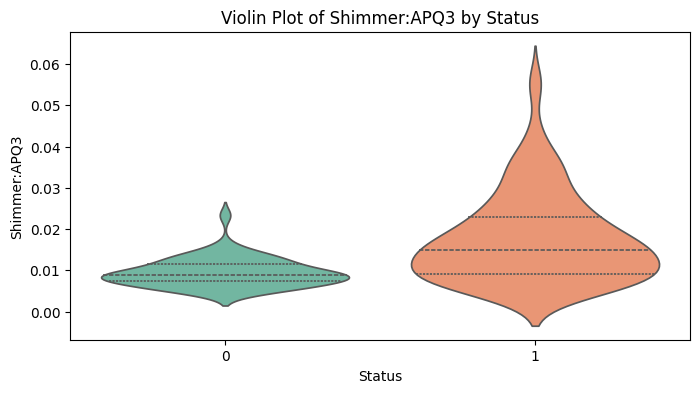

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


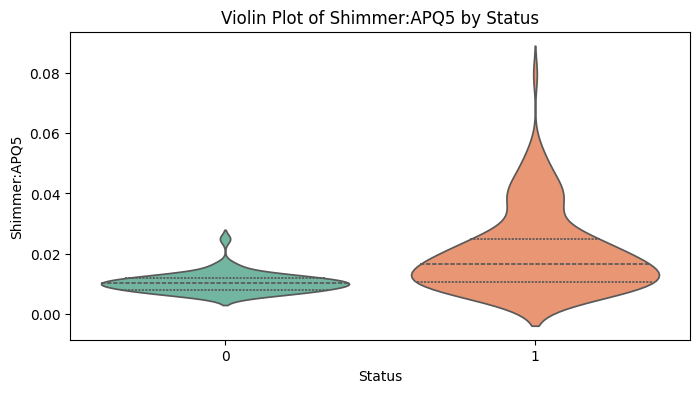

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


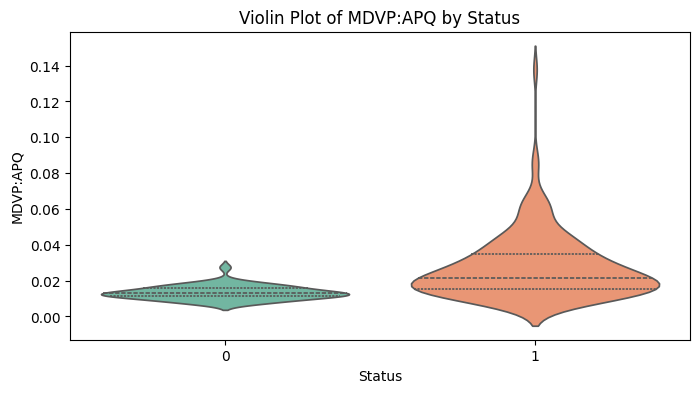

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


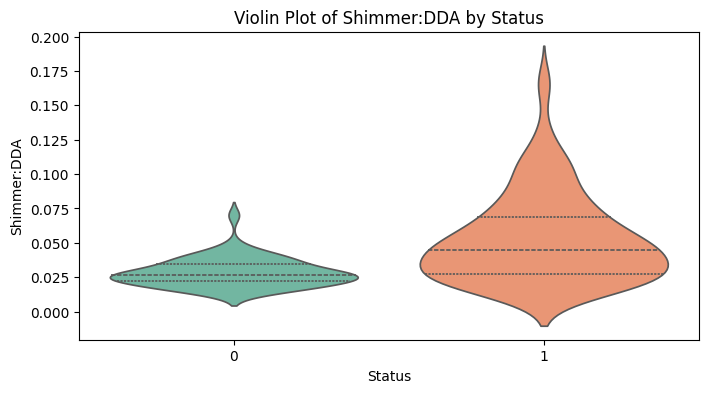

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


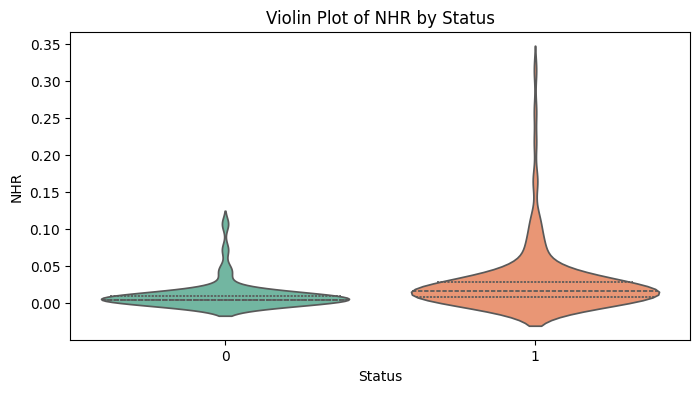

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


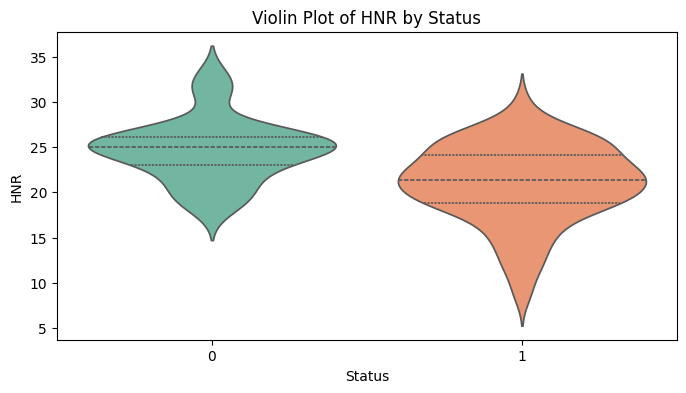

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


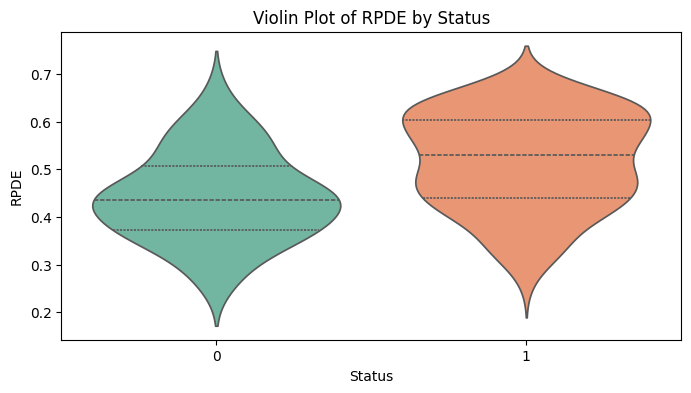

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


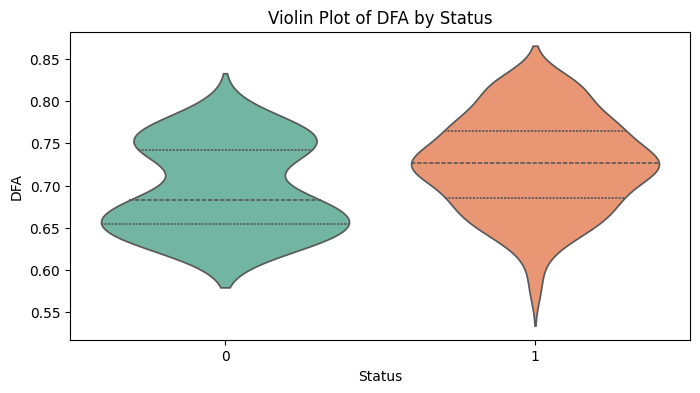

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


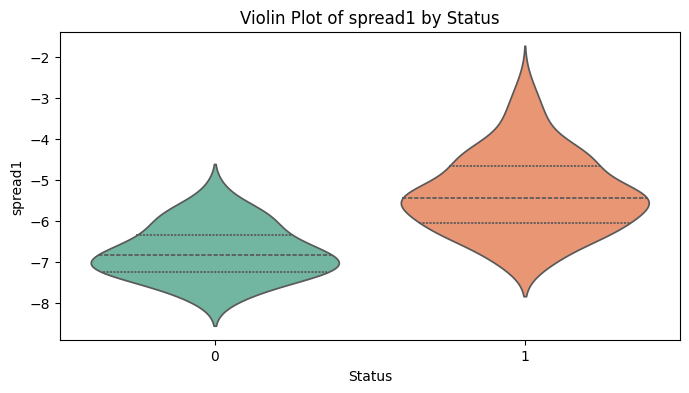

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


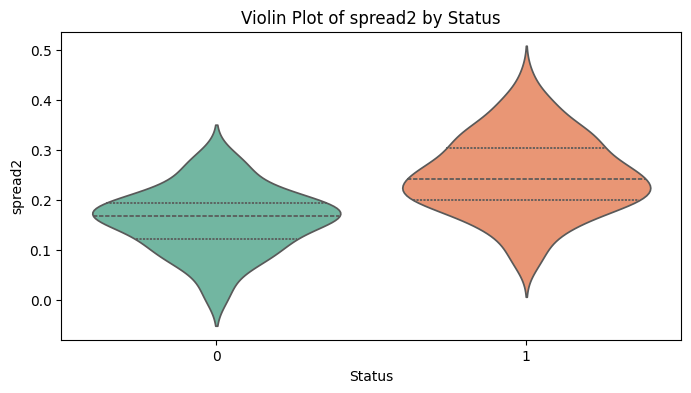

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


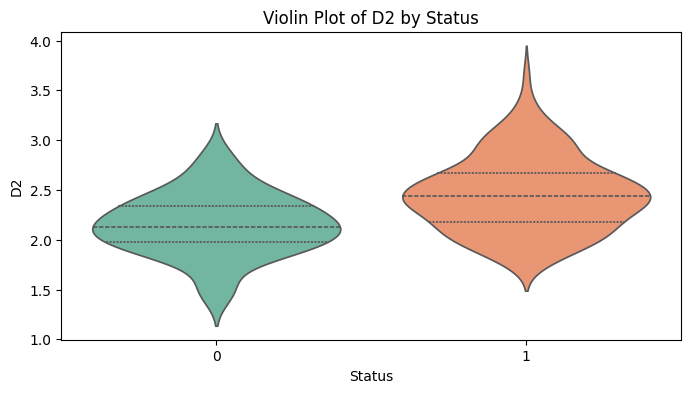

/var/folders/r2/hgdrwd0d6d130yrbf16p96qw0000gn/T/ipykernel_9394/462362659.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")


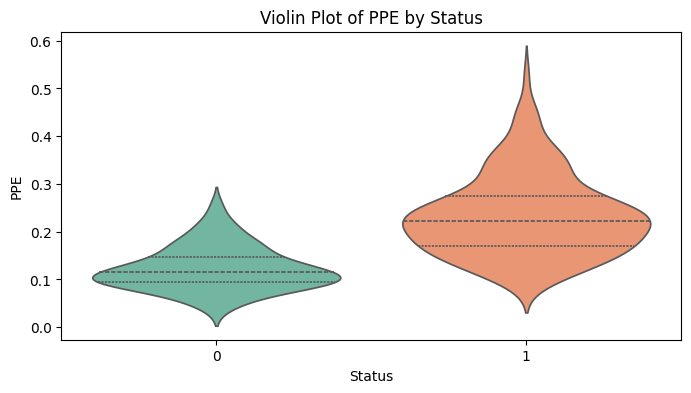

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Assuming `parkin_data` is your DataFrame and 'status' is your target variable

cols_of_interest = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 
    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 
    'spread1', 'spread2', 'D2', 'PPE'
]

# Set up matplotlib figure size
plt.figure(figsize=(12, 6))
for col in cols_of_interest:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='status', y=col, data=parkin_data, inner="quartile", palette="Set2")
    plt.title(f'Violin Plot of {col} by Status')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.show()


### Spearman Correlation

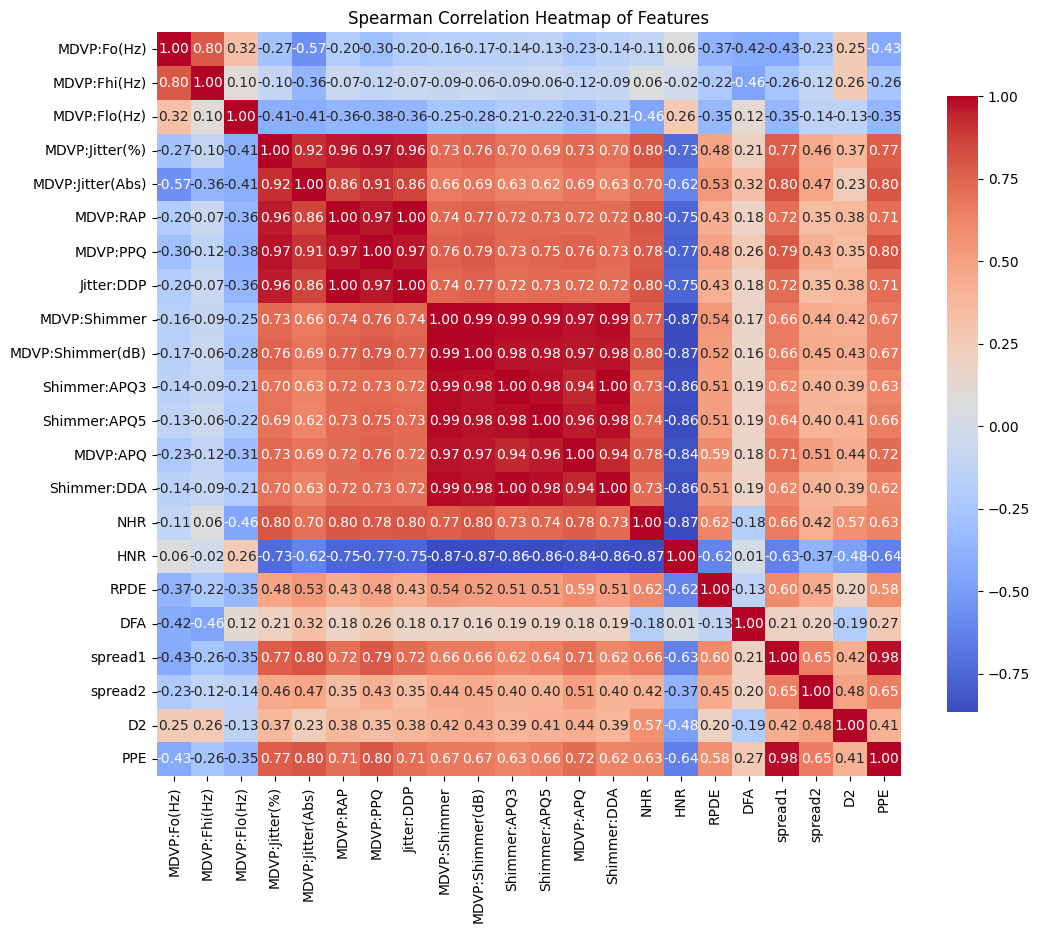

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman correlation matrix
correlation_matrix = parkin_data[cols_of_interest].corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with the Spearman correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})

# Customize the plot
plt.title('Spearman Correlation Heatmap of Features')
plt.show()


### PCA Plot

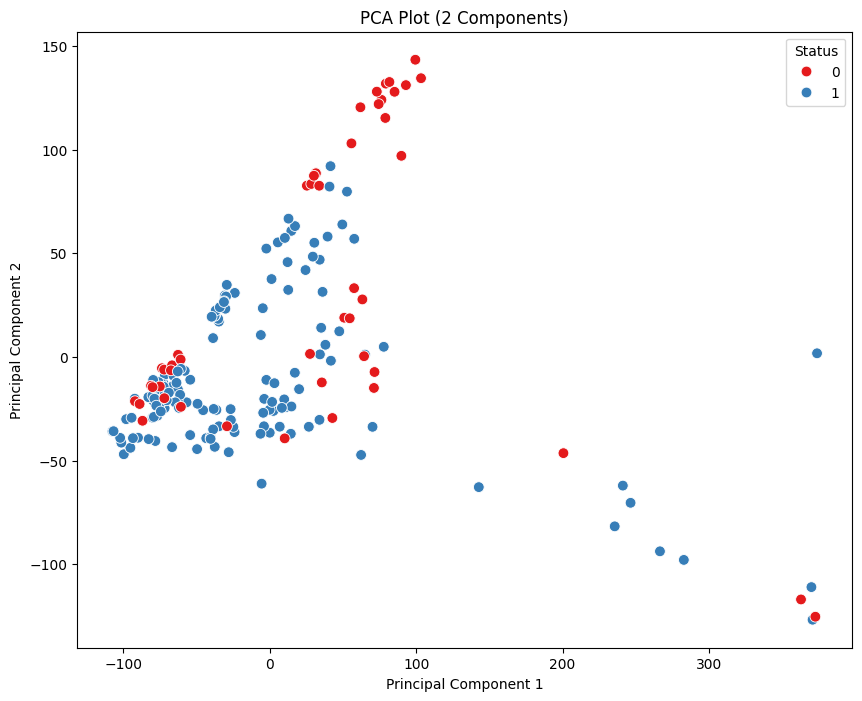

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA, setting the number of components to 2 for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(parkin_data[cols_of_interest])

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['status'] = parkin_data['status']

# Plot PCA components with color-coding by status
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='status', palette='Set1', s=60)
plt.title('PCA Plot (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Status')
plt.show()


### t-SNE plot

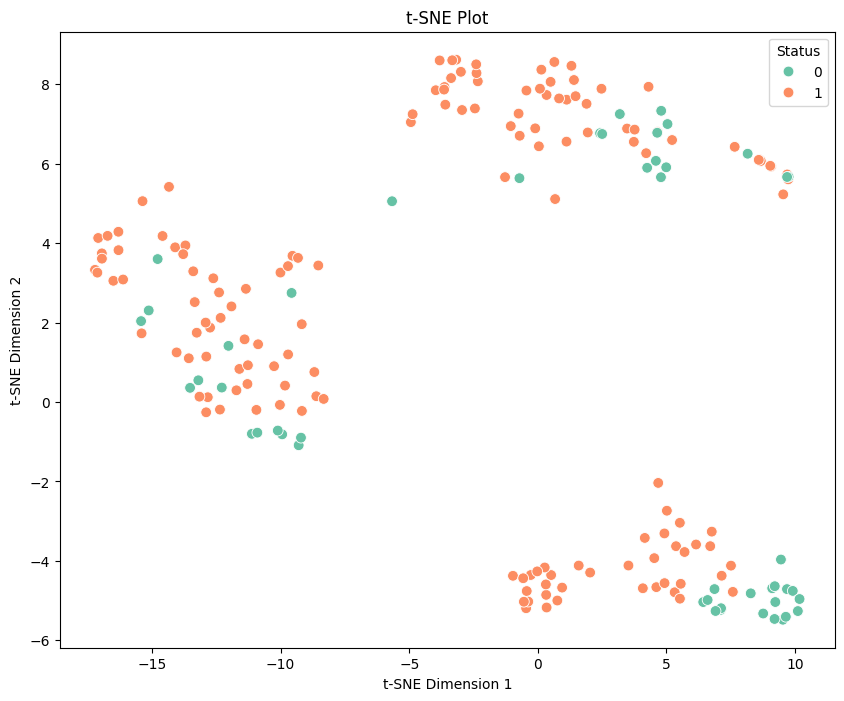

In [56]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(parkin_data[cols_of_interest])

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])
tsne_df['status'] = parkin_data['status']

# Plot t-SNE components with color-coding by status
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='status', palette='Set2', s=60)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Status')
plt.show()


In [58]:
# Checking distribution of target variable = status
parkin_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

0 ----> Healthy

1 ----> Parkinson's Positive

In [59]:
# Grouping the data based on target variable "status"

parkin_data.groupby("status").mean(numeric_only=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


This above output showes the mean of both healthy (0) and parkinsons positive (1) with each column, a clear difference is seen in between the two mean values, healthy people have higher MDVP (Average vocal fundamental frequency). This difference will be clearly understood by ML models.

Data Pre-Processing

Seperating features & Target (status)

In [60]:
X = parkin_data.drop(columns =['name', 'status'], axis = 1)
Y = parkin_data['status']

In [61]:
print (X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [62]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [63]:
# Splitting data into training and testing data 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)


In [64]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization



In [65]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [66]:
X_train = scaler.transform(X_train)

X_test = scaler.transform (X_test)
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Model Training

Support Vector Machine Model:


In [67]:
model = svm.SVC(kernel='linear')

In [68]:
# Training the SVM model with training data (X train)

model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, Y_train)

# Cross-validation on training data
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print("Cross-Validation Accuracy on Training Data:", cv_scores.mean())

# Training data predictions and evaluation
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_pred)
print("Training Data Accuracy:", train_accuracy)
print("Training Data Classification Report:\n", classification_report(Y_train, train_pred))

# Testing data predictions and evaluation
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_pred)
print("Test Data Accuracy:", test_accuracy)
print("Test Data Classification Report:\n", classification_report(Y_test, test_pred))

# Displaying the Confusion Matrix for Test Data
print("Confusion Matrix (Test Data):\n", confusion_matrix(Y_test, test_pred))


Cross-Validation Accuracy on Training Data: 0.8524193548387098
Training Data Accuracy: 0.8846153846153846
Training Data Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75        40
           1       0.90      0.96      0.93       116

    accuracy                           0.88       156
   macro avg       0.87      0.82      0.84       156
weighted avg       0.88      0.88      0.88       156

Test Data Accuracy: 0.8717948717948718
Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39

Confusion Matrix (Test Data):
 [[ 5  3]
 [ 2 29]]


In [69]:
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy score of training data:", training_data_accuracy)

Accuracy score of training data: 0.8846153846153846


In [70]:
# Accuracy score on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 0.8717948717948718


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Logistic Regression Accuracy: 0.8205128205128205
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Random Forest Accuracy: 0.7948717948717948
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.84      0.87        31

    accuracy                           0.79        39
   macro avg       0.70      0.73      0.71        39
weighted avg       0.82      0.79      0.80        39



In [82]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelBinarizer

# Dictionary to store results for each model
model_performance = {}

# Function to evaluate model and store metrics
def evaluate_model(model, model_name, X_train, Y_train, X_test, Y_test):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predictions on test data
    test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test, test_pred)
    precision = precision_score(Y_test, test_pred)
    recall = recall_score(Y_test, test_pred)
    f1 = f1_score(Y_test, test_pred)
    
    # Calculate AUC score
    lb = LabelBinarizer()
    Y_test_binarized = lb.fit_transform(Y_test)
    test_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    auc = roc_auc_score(Y_test_binarized, test_pred_prob)

    # Store the results
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    }

# Evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Run evaluation for each model
for model_name, model in models.items():
    evaluate_model(model, model_name, X_train, Y_train, X_test, Y_test)

# Convert results to DataFrame and display
performance_df = pd.DataFrame(model_performance).T
print(performance_df)


                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.820513   0.900000  0.870968  0.885246  0.834677
SVM                  0.871795   0.906250  0.935484  0.920635  0.818548
Random Forest        0.794872   0.896552  0.838710  0.866667  0.893145


### SVM is the best model, due to it's highest accuracy (87.18%) on the test set, meaning it correctly classifies the most samples among all models. With the highest recall (93.55%) and a high precision (90.63%), SVM effectively balances between capturing true positives and avoiding false positives. Its F1 Score (92.06%) combines both precision and recall well, indicating it maintains a good balance, which is especially valuable when both false positives and false negatives are costly.

### While Random Forest has the highest AUC (89.31%), this only reflects how well it ranks predictions rather than absolute classification accuracy. Since SVM outperforms on accuracy, precision, recall, and F1 score, it’s still the most robust choice for this dataset. SVM is the best model for this dataset, as it delivers the highest overall classification performance, balancing accuracy and sensitivity, which is often crucial in classification tasks.

Building a Predictive System

In [32]:
input_data = (162.568,198.346,77.63,0.00502,0.00003,0.0028,	0.00253,0.00841,0.01791,0.168,0.0079,0.01057,0.01799,0.0238,0.0117,	25.678,	0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242)

# changing input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standarize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0]== 0):
    print("The person is Healthy")

else: 
    print("The person is suffering with Parkinsons Disease")


[1]
The person is suffering with Parkinsons Disease


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
input_data = (197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.3483,0.177551,1.743867,0.085569)

# changing input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standarize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0]== 0):
    print("The person is Healthy")

else: 
    print("The person is suffering with Parkinsons Disease")

[0]
The person is Healthy


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
